<a href="https://colab.research.google.com/github/TiagoHarari/SP500-app/blob/main/sp500ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este Collab es para probar y trabajar los conceptos realizados de manera mas legible y flexible.



*   Tiago Harari
*   tiago.harari@gmail.com


*   Fuente: Wikipedia (https://en.wikipedia.org/wiki/List_of_S%26P_500_companies)







---



**Importacion de librerias y creacion de DataFrame**

In [ ]:
!pip install streamlit

In [3]:
import streamlit as st
import pandas as pd
import base64
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf

In [25]:
def load_data():
    url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    html = pd.read_html(url, header = 0)
    df = html[0]
    return df
 #load_data retorna un DataFrame de la informacion de Wikipedia

In [26]:
df = load_data()

In [27]:
df.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989




---



**Agrupamiento por sector que compone al indice**

In [7]:
sector = df.groupby('GICS Sector')


In [8]:
sector

In [15]:
len(sector)

11

A continuacion, todos los sectores pertenecientes al indice.


In [9]:
df['GICS Sector'].unique()

array(['Industrials', 'Health Care', 'Information Technology',
       'Utilities', 'Financials', 'Materials', 'Consumer Discretionary',
       'Real Estate', 'Communication Services', 'Consumer Staples',
       'Energy'], dtype=object)

In [ ]:
sorted_sector_unique = sorted( df['GICS Sector'].unique() )
selected_sector = st.sidebar.multiselect('Sector', sorted_sector_unique, sorted_sector_unique)

In [11]:
# Filtering data
df_selected_sector = df[ (df['GICS Sector'].isin(selected_sector)) ]

In [14]:
df_selected_sector

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [16]:
sector.describe()

CIK                                                   \
                       count          mean            std      min        25%   
GICS Sector                                                                     
Communication Services  22.0  1.150190e+06  503816.763824  29989.0  833146.75   
Consumer Discretionary  52.0  9.417031e+05  424437.605477  37996.0  820586.25   
Consumer Staples        38.0  4.932800e+05  659308.763424   7084.0   27947.75   
Energy                  22.0  8.334150e+05  654494.803186   4447.0   95502.00   
Financials              71.0  7.272561e+05  540442.918268   4962.0   79971.50   
Health Care             63.0  8.428977e+05  558701.706093   1800.0  312190.00   
Industrials             78.0  7.241301e+05  632614.510086   4281.0   76590.50   
Information Technology  67.0  9.005804e+05  498502.693082   2488.0  759324.00   
Materials               28.0  8.470378e+05  713987.434946   2969.0   67840.25   
Real Estate             31.0  9.564368e+05  373794.645688  34903.0  892604.00   
Utilities               31.0  8.730384e+05  477431.209001   4904.0  742555.00   

                                                          
                              50%         75%        max  
GICS Sector                                               
Communication Services  1225195.0  1564708.00  1754301.0  
Consumer Discretionary   943392.5  1202861.75  1590895.0  
Consumer Staples          78950.0   929235.25  1996862.0  
Energy                   946736.0  1477022.75  1841666.0  
Financials               886982.0  1139155.00  1633917.0  
Health Care              885725.0  1118775.50  1964738.0  
Industrials              760177.5  1228521.00  1996810.0  
Information Technology   896878.0  1304009.50  1730168.0  
Materials                915994.5  1419355.00  2005951.0  
Real Estate             1034054.0  1067255.50  1705696.0  
Utilities                922224.0  1078609.50  1868275.0

In [17]:
list(df.Symbol) #lista con los simbolos de la informacion de Wikipedia

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BK',
 'BBWI',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BA',
 'BKNG',
 'BWA',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'BLDR',
 'BG',
 'BXP',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CAG'



---



**1) Descarga de la data utilizando la libreria yfinance**

In [18]:
data = yf.download(
        tickers = list(df_selected_sector[:10].Symbol),
        period = "ytd",
        interval = "1d",
        group_by = 'ticker',
        auto_adjust = True,
        prepost = True,
        threads = True,
        proxy = None
    )

[*********************100%***********************]  10 of 10 completed


Ahora podemos ver el maximo, minimo, precio de apertura y cierre de cada ticker

In [19]:
data

Ticker                            AMD                                      \
Price                            Open        High         Low       Close   
Date                                                                        
2024-01-02 00:00:00+00:00  144.279999  144.399994  137.429993  138.580002   
2024-01-03 00:00:00+00:00  135.710007  137.429993  133.740005  135.320007   
2024-01-04 00:00:00+00:00  134.300003  137.699997  134.000000  136.009995   
2024-01-05 00:00:00+00:00  136.779999  141.009995  136.440002  138.580002   
2024-01-08 00:00:00+00:00  140.360001  147.149994  140.149994  146.179993   
...                               ...         ...         ...         ...   
2024-08-26 00:00:00+00:00  154.699997  158.279999  148.910004  149.990005   
2024-08-27 00:00:00+00:00  150.130005  151.699997  148.440002  150.500000   
2024-08-28 00:00:00+00:00  149.399994  150.429993  144.720001  146.360001   
2024-08-29 00:00:00+00:00  146.589996  149.490005  144.470001  145.490005   
2024-08-30 00:00:00+00:00  147.492996  148.990005  145.250000  147.630005   

Ticker                                      ABT                          \
Price                        Volume        Open        High         Low   
Date                                                                      
2024-01-02 00:00:00+00:00  64902000  107.922623  109.341105  107.922623   
2024-01-03 00:00:00+00:00  61988600  108.493969  108.602326  107.656674   
2024-01-04 00:00:00+00:00  58610300  108.040844  109.370667  107.873387   
2024-01-05 00:00:00+00:00  69595000  109.055453  109.390375  108.385615   
2024-01-08 00:00:00+00:00  71756900  109.469168  110.838394  109.262307   
...                             ...         ...         ...         ...   
2024-08-26 00:00:00+00:00  49893300  112.739998  113.260002  112.059998   
2024-08-27 00:00:00+00:00  35102700  113.059998  113.169998  112.139999   
2024-08-28 00:00:00+00:00  34075800  113.099998  113.419998  112.370003   
2024-08-29 00:00:00+00:00  31602100  113.300003  113.500000  112.519997   
2024-08-30 00:00:00+00:00  22691842  113.000000  113.320000  111.889999   

Ticker                                          ...        AOS             \
Price                           Close   Volume  ...       Open       High   
Date                                            ...                         
2024-01-02 00:00:00+00:00  108.208290  5058600  ...  80.763254  81.682592   
2024-01-03 00:00:00+00:00  107.883232  4239600  ...  79.942771  79.942771   
2024-01-04 00:00:00+00:00  109.321419  5296100  ...  77.817420  79.537467   
2024-01-05 00:00:00+00:00  109.144112  4127700  ...  78.193068  78.756532   
2024-01-08 00:00:00+00:00  110.720192  5030400  ...  78.361115  78.588481   
...                               ...      ...  ...        ...        ...   
2024-08-26 00:00:00+00:00  112.699997  3212700  ...  82.959999  83.220001   
2024-08-27 00:00:00+00:00  113.099998  2705300  ...  81.849998  82.389999   
2024-08-28 00:00:00+00:00  112.900002  3836700  ...  81.720001  82.650002   
2024-08-29 00:00:00+00:00  112.760002  3375800  ...  82.400002  82.940002   
2024-08-30 00:00:00+00:00  113.040001  1696418  ...  82.480003  83.305000   

Ticker                                                          AES  \
Price                            Low      Close   Volume       Open   
Date                                                                  
2024-01-02 00:00:00+00:00  80.259107  80.506241   613800  18.578922   
2024-01-03 00:00:00+00:00  77.194639  77.807533  1276800  18.549804   
2024-01-04 00:00:00+00:00  77.431892  78.469849   880600  18.530389   
2024-01-05 00:00:00+00:00  77.807540  78.133759   650300  18.248888   
2024-01-08 00:00:00+00:00  77.540637  78.361115   790000  18.142115   
...                              ...        ...      ...        ...   
2024-08-26 00:00:00+00:00  82.120003  82.360001   562100  18.170000   
2024-08-27 00:00:00+00:00  80.989998  81.760002   702400  17.799999   
2024-08-28



---



**2) Crear funcion que segun el parametro de entrada (symbol) retorne un grafico**

In [28]:
def price_plot(symbol): # argumento de entrada
    df = pd.DataFrame(data[symbol].Close)
    df['Date'] = df.index

    # Crear figura y ejes explícitamente
    fig, ax = plt.subplots()

    ax.fill_between(df.Date, df.Close, color='skyblue', alpha=0.3)
    ax.plot(df.Date, df.Close, color='skyblue', alpha=0.8)
    ax.set_xticks(df.Date[::len(df)//10])  # Para no sobrecargar los xticks
    ax.set_xticklabels(df.Date[::len(df)//10], rotation=90)
    ax.set_title(symbol, fontweight='bold')
    ax.set_xlabel('Date', fontweight='bold')
    ax.set_ylabel('Closing Price', fontweight='bold')
    return plt.show()

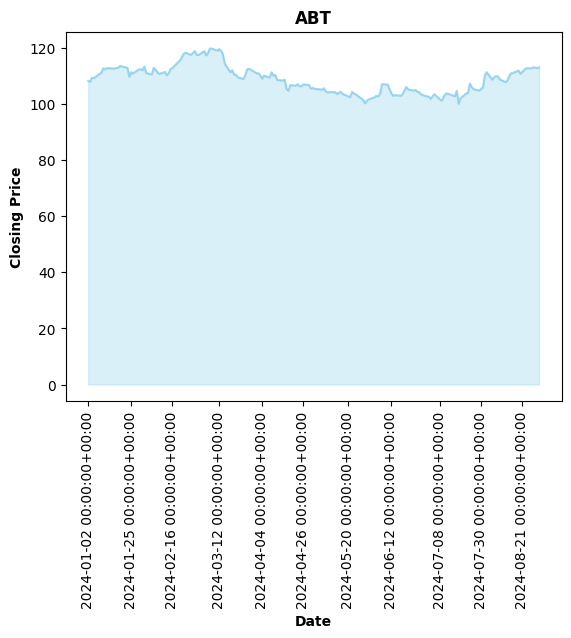

In [29]:
price_plot("ABT")

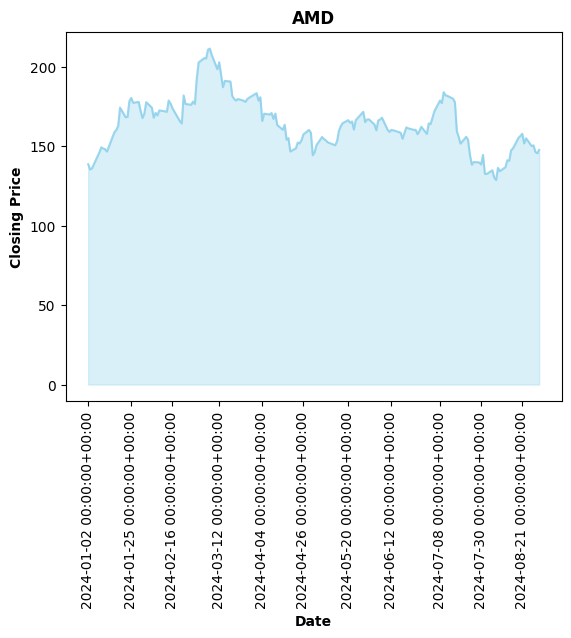

In [31]:
price_plot("AMD")



---



**3) Bucle para que se muestren los plots segun el simbolo ingresado, utilizando la funcion**

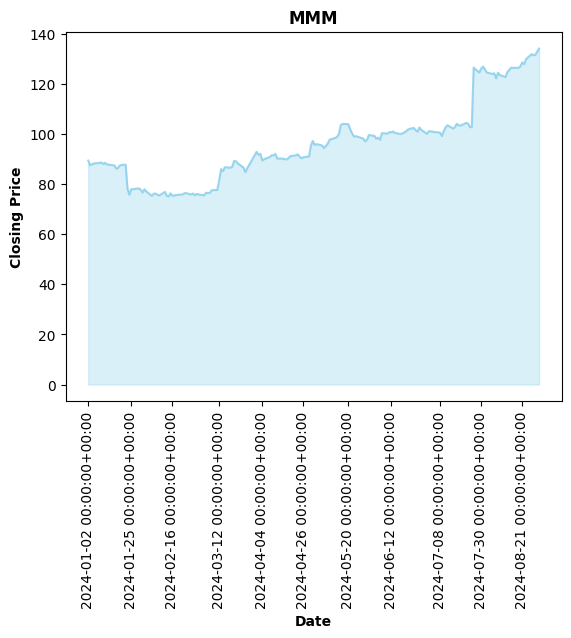

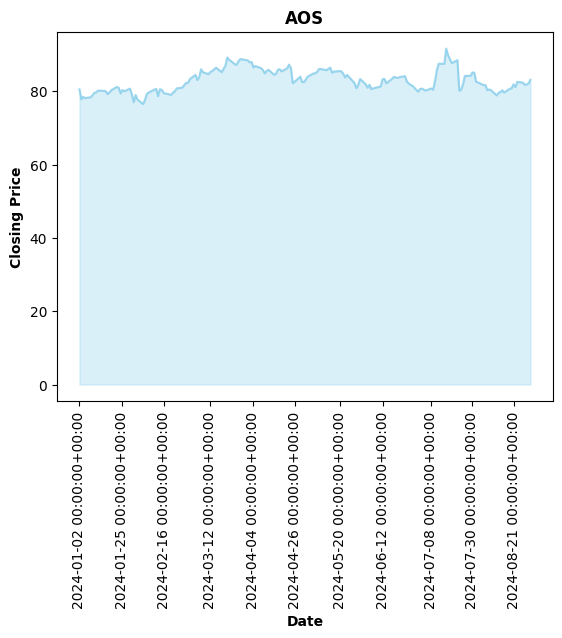

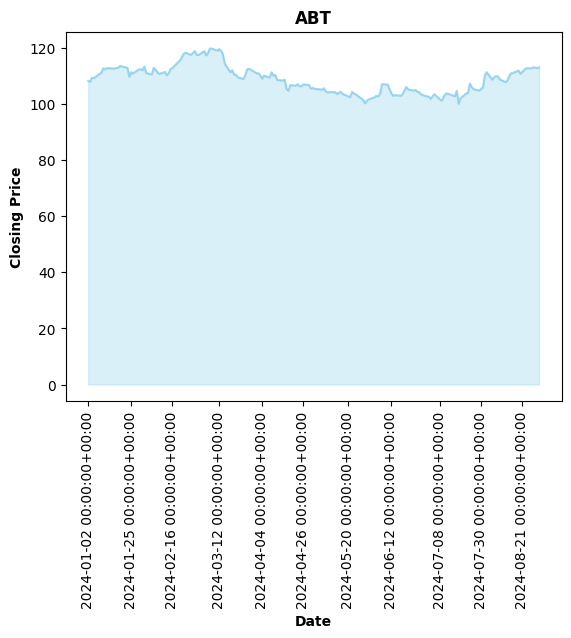

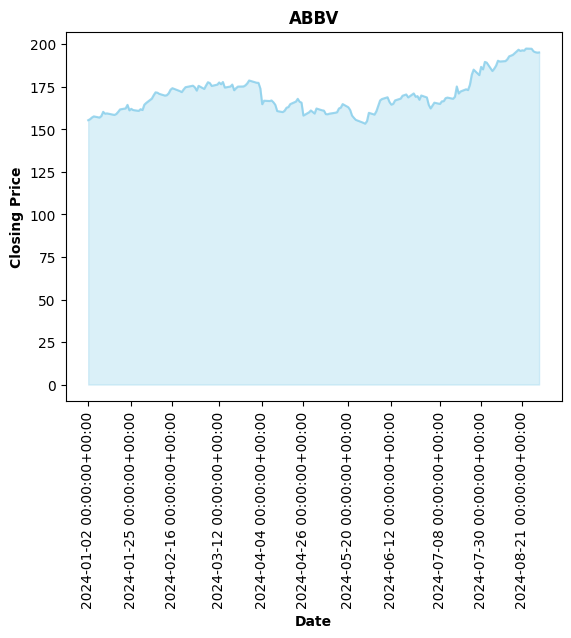

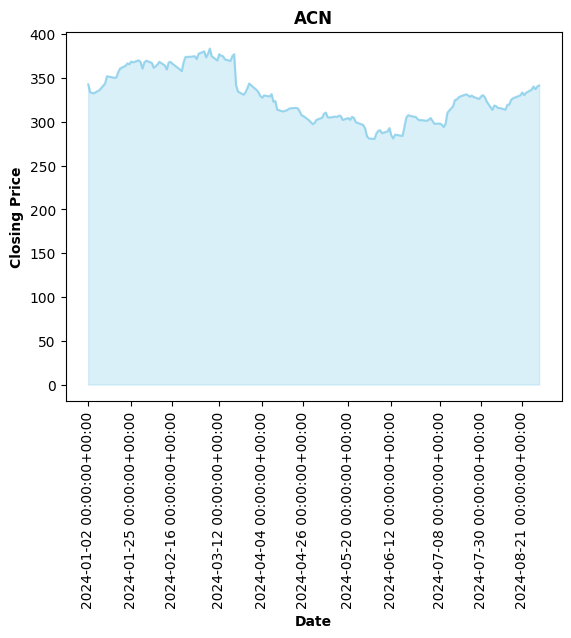

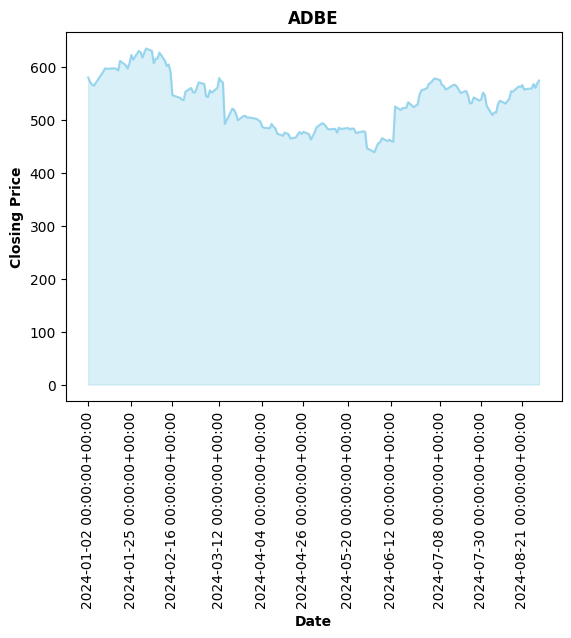

In [35]:
for i in list(df_selected_sector.Symbol)[:6]:
        price_plot(i)